In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv('/content/bank-additional.csv',delimiter=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# Separate features and target variable
X = df.drop(columns=['y'])
y = df['y'].map({'yes': 1, 'no': 0})

In [7]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocess categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ], remainder='passthrough')

X_preprocessed = preprocessor.fit_transform(X)

In [8]:
X_preprocessed

array([[ 0.0000e+00,  1.0000e+00,  0.0000e+00, ..., -4.6200e+01,
         1.3130e+00,  5.0991e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -3.6400e+01,
         4.8550e+00,  5.1910e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -4.1800e+01,
         4.9620e+00,  5.2281e+03],
       ...,
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -4.6200e+01,
         1.3540e+00,  5.0991e+03],
       [ 1.0000e+00,  0.0000e+00,  0.0000e+00, ..., -3.6100e+01,
         4.9660e+00,  5.2281e+03],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -4.2000e+01,
         4.1200e+00,  5.1958e+03]])

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

In [10]:
# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.8786
Precision: 0.4395
Recall: 0.5267
F1 Score: 0.4792


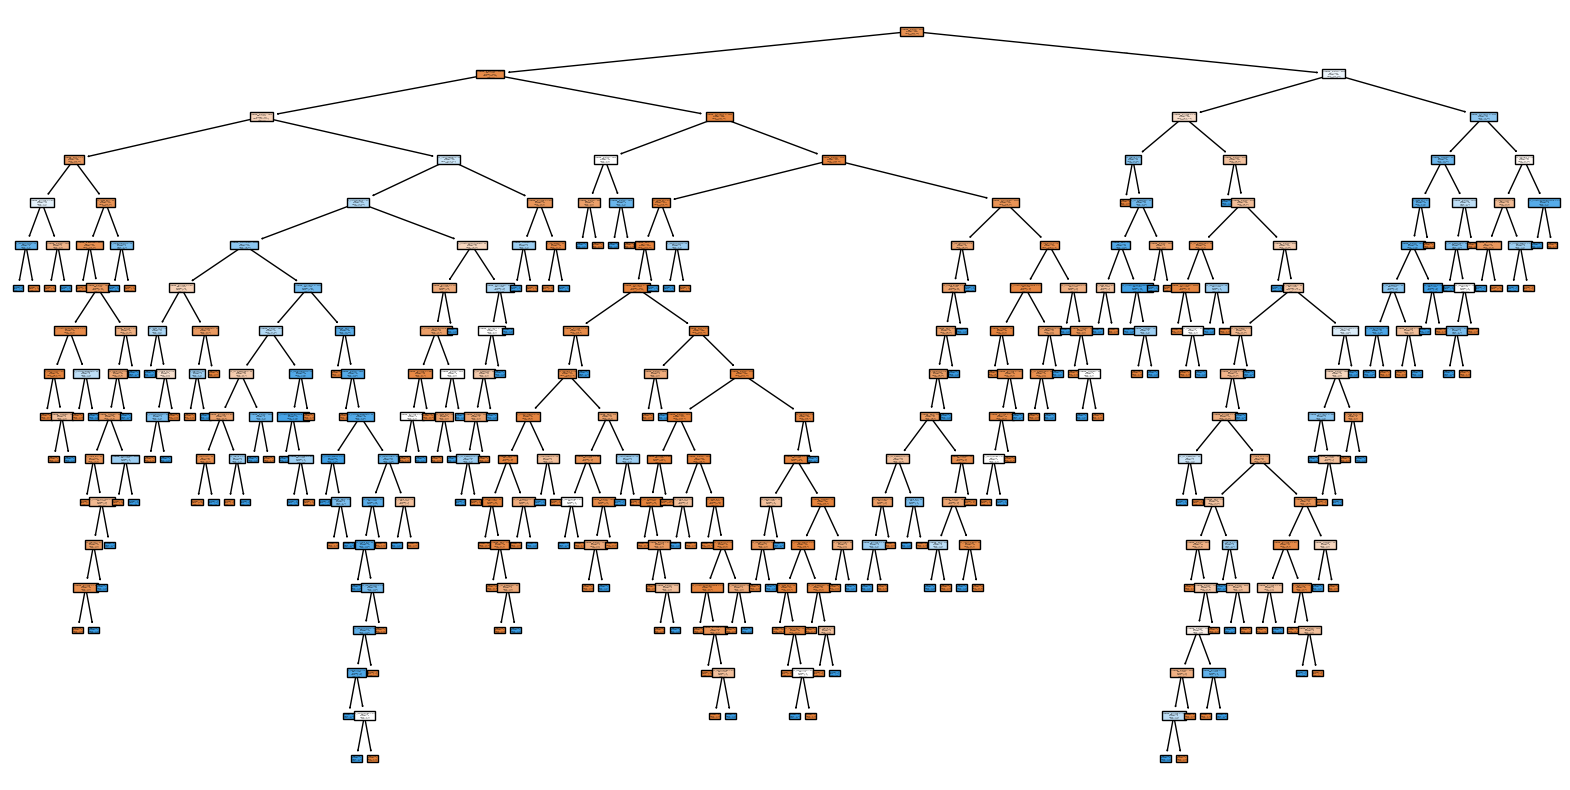

In [12]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['no', 'yes'])
plt.show()